In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)

# Add the main folder to the system path
sys.path.insert(0, main_folder)

# Verify the working directory
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'

with open('data/LDS_response_sinFuncIndiv_regen.pickle', 'rb') as f:
    test_result = pickle.load(f)

test_result.keys()

/home/sam/Desktop/beh_timescale


dict_keys(['tau', '020624WT_s2_0dpa_30m_3mPeriod', '043024WT_s1_0dpa_30m_3.2mPeriod', '043024WT_s2_0dpa_30m_3.2mPeriod', '021524WT_s2_2dpa_30m_3mPeriod', '020624WT_s1_0dpa_30m_3.1mPeriod', '020924WT_s2_3dpa_30m_3mPeriod', '020924WT_s1_3dpa_30m_3.1mPeriod', '052224WT_s2_1dpa_30m_3mPeriod', '050223heads_s2_0dpa_30m_3mPeriod', '050223WT_s1_0dpa_30m_3mPeriod', '0710243WT_s2_2dpa_30m_3mPeriod', '0716243WT_s1_1dpa_30m_3mPeriod', '0716243heads_s2_1dpa_30m_3mPeriod', '071824WT_s1_3dpa_30m_3mPeriod', '071924WT_s2_4dpa_30m_3mPeriod', '071924heads_s1_4dpa_30m_3mPeriod', '071824heads_s2_3dpa_30m_3mPeriod'])

Filtered Experiments Keys: dict_keys(['020624WT_s2_0dpa_30m_3mPeriod', '021524WT_s2_2dpa_30m_3mPeriod', '020924WT_s2_3dpa_30m_3mPeriod', '052224WT_s2_1dpa_30m_3mPeriod', '050223WT_s1_0dpa_30m_3mPeriod', '0710243WT_s2_2dpa_30m_3mPeriod', '0716243WT_s1_1dpa_30m_3mPeriod', '071824WT_s1_3dpa_30m_3mPeriod', '071924WT_s2_4dpa_30m_3mPeriod'])
Group data shape after removing NaNs for day 0: (165, 4201)
Group data shape after removing NaNs for day 1: (138, 4201)
Group data shape after removing NaNs for day 2: (154, 4201)
Group data shape after removing NaNs for day 3: (155, 4201)
Group data shape after removing NaNs for day 4: (66, 4201)


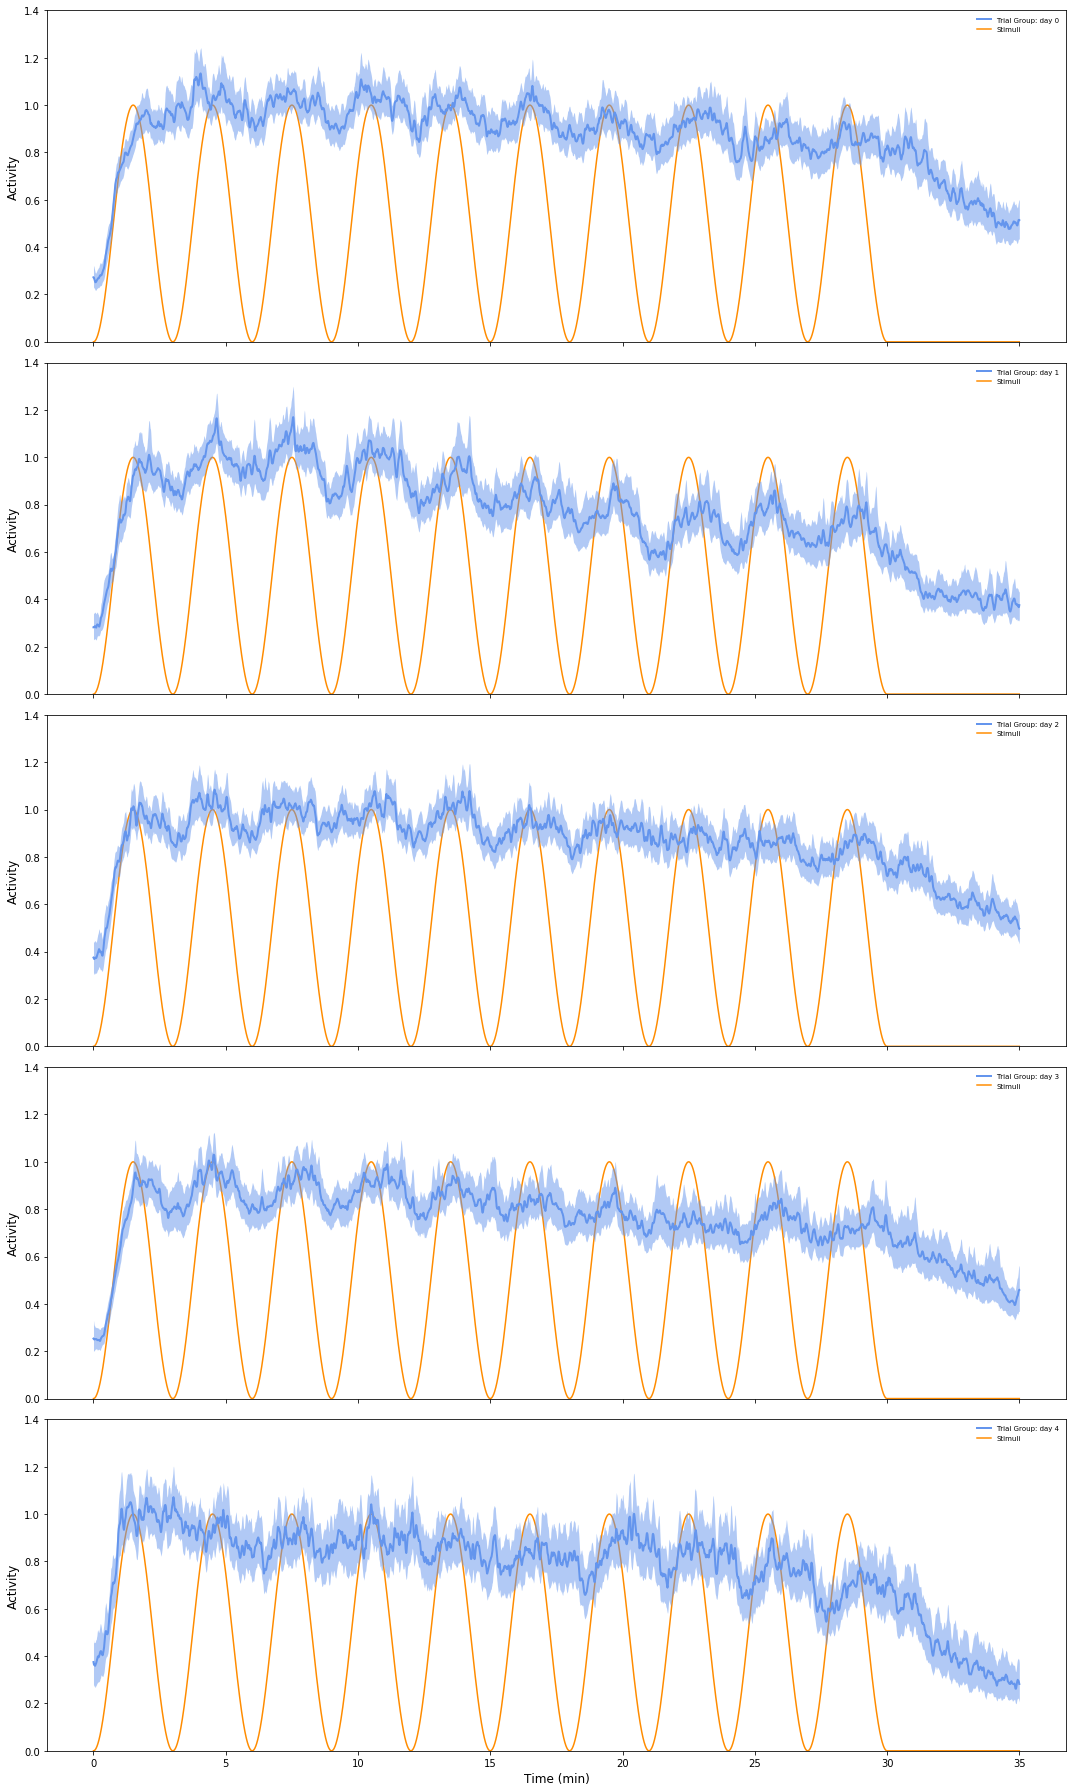

In [8]:
import pickle
from analysis_functions.results_sin_regen_indiv import *
from tools.preparing_data import *

# Load the pickle data for regeneration experiments
with open('data/LDS_response_sinFuncIndiv_regen.pickle', 'rb') as f:
    test_result_regen = pickle.load(f)

# Load and filter the regeneration data
test_result_regen, filtered_experiments_regen = load_and_filter_regen_data(
    filepath='data/LDS_response_sinFuncIndiv_regen.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='3mPeriod',
    exclude_dates=[]
)

# Check the keys of the filtered experiments
print("Filtered Experiments Keys:", filtered_experiments_regen.keys())

# Prepare the DataFrame
regen_df = prepare_regen_df(test_result_regen, filtered_experiments_regen)
# regen_df
tau = test_result_regen['tau']

# Define trial groups
trial_groups = {
    'day 0': range(0, 12),
    'day 1': range(12, 24),
    'day 2': range(24, 36),
    'day 3': range(36, 48),
    'day 4': range(48, 60),
}

# Aggregate and bootstrap data
n_boot = 1000  # Ensure n_boot is an integer
conf_interval = 95  # Ensure conf_interval is an integer

bootstrapped_results, sliced_tau = aggregate_and_bootstrap(
    regen_df, trial_groups, tau, n_boot=n_boot, conf_interval=conf_interval
)

# Extract and normalize stimuli data
first_exp_key = next(iter(filtered_experiments_regen))
stimuli = test_result_regen[first_exp_key]['stim']
time_indices = np.where((tau >= 0) & (tau <= 35))[0]
stimuli = stimuli[time_indices]
stimuli = (stimuli - np.min(stimuli)) / (np.max(stimuli) - np.min(stimuli))

# Plot bootstrapped trials with stimuli
plot_bootstrapped_trials(bootstrapped_results, sliced_tau, stimuli)

# Save the figure
# plt.rcParams['svg.fonttype'] = 'none'
# fig.savefig('plots/SinWaves__3m_64ampVariation.svg')